Kita akan cek distribusi dengan import file csv.

In [1]:
from google.colab import files
import pandas as pd
import io

# 1. Menampilkan prompt unggah file dari komputer lokal
uploaded = files.upload()

# 2. Memproses dan membaca file yang diunggah
# Iterasi melalui file yang diunggah (biasanya hanya satu)
for filename in uploaded.keys():
  # Menggunakan io.StringIO untuk membaca konten byte sebagai teks
  df = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))
  print(f'File "{filename}" berhasil dimuat ke DataFrame.')

# 3. Tampilkan beberapa baris pertama untuk verifikasi
print(df.head())

Saving Mall_Customers.csv to Mall_Customers.csv
File "Mall_Customers.csv" berhasil dimuat ke DataFrame.
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Fitur Mengecek Missing Value


In [19]:
import pandas as pd

# Muat data dari file yang diunggah
try:
    df = pd.read_csv('Mall_Customers.csv')
    total_rows = len(df)
except FileNotFoundError:
    print("Error: File 'Mall_Customers.csv' tidak ditemukan. Pastikan file sudah diunggah.")
    exit()

# --- Membuat Tabel Cek Jumlah Nilai ---

# 1. Hitung jumlah non-null
non_null_count = df.count()

# 2. Hitung jumlah missing values
missing_count = df.isnull().sum()

# 3. Hitung persentase missing values
missing_percentage = (missing_count / total_rows) * 100

# 4. Gabungkan hasilnya ke dalam satu DataFrame (Tabel)
check_table = pd.DataFrame({
    'Tipe Data': df.dtypes,
    'Total Non-Null': non_null_count,
    'Missing Values (Jumlah)': missing_count,
    'Missing Values (%)': missing_percentage.round(2).astype(str) + '%'
})

print("--- Tabel Cek Missing Value dan Jumlah Data per Kolom ---")
print(check_table)

--- Tabel Cek Missing Value dan Jumlah Data per Kolom ---
                       Tipe Data  Total Non-Null  Missing Values (Jumlah)  \
CustomerID                 int64             200                        0   
Gender                    object             200                        0   
Age                        int64             200                        0   
Annual Income (k$)         int64             200                        0   
Spending Score (1-100)     int64             200                        0   

                       Missing Values (%)  
CustomerID                           0.0%  
Gender                               0.0%  
Age                                  0.0%  
Annual Income (k$)                   0.0%  
Spending Score (1-100)               0.0%  


Fitur Mengecek Unique Value

In [20]:
import pandas as pd

# Muat data
try:
    df = pd.read_csv('Mall_Customers.csv')
except FileNotFoundError:
    print("Error: File 'Mall_Customers.csv' tidak ditemukan. Pastikan file sudah diunggah.")
    exit()

print("--- Analisis Nilai Unik dan Tipe Fitur ---")

analysis_list = []
total_rows = len(df)

for col in df.columns:
    unique_count = df[col].nunique()
    data_type = df[col].dtype

    if data_type == 'object':
        # Untuk kolom kategorikal (object), tampilkan nilainya
        value_info = df[col].value_counts().to_dict()
    elif unique_count == total_rows:
        # Untuk kolom ID
        value_info = "ID Unik (Dihapus dalam Clustering)"
    elif unique_count < 20:
        # Untuk kolom numerik diskrit kecil
        value_info = f"Diskrit: {unique_count} level"
    else:
        # Untuk kolom numerik kontinu
        value_info = f"Kontinu: {unique_count} nilai unik"

    analysis_list.append({
        'Kolom': col,
        'Tipe Data': data_type,
        'Jumlah Nilai Unik': unique_count,
        'Karakteristik / Distribusi': value_info
    })

analysis_df = pd.DataFrame(analysis_list)

print(analysis_df.to_string(index=False))

print("\n--- Kesimpulan ---")
print("Kolom numerik/kontinu yang akan digunakan untuk clustering (setelah scaling): Age, Annual Income (k$), Spending Score (1-100).")
print("Kolom 'Gender' harus di-encode jika ingin dimasukkan.")
print("Kolom 'CustomerID' harus diabaikan.")

--- Analisis Nilai Unik dan Tipe Fitur ---
                 Kolom Tipe Data  Jumlah Nilai Unik         Karakteristik / Distribusi
            CustomerID     int64                200 ID Unik (Dihapus dalam Clustering)
                Gender    object                  2        {'Female': 112, 'Male': 88}
                   Age     int64                 51             Kontinu: 51 nilai unik
    Annual Income (k$)     int64                 64             Kontinu: 64 nilai unik
Spending Score (1-100)     int64                 84             Kontinu: 84 nilai unik

--- Kesimpulan ---
Kolom numerik/kontinu yang akan digunakan untuk clustering (setelah scaling): Age, Annual Income (k$), Spending Score (1-100).
Kolom 'Gender' harus di-encode jika ingin dimasukkan.
Kolom 'CustomerID' harus diabaikan.


Fitur Skala Numerik

Data 'Mall_Customers.csv' berhasil dimuat.

--- Statistik Deskriptif (Cek Skala Min/Max/Std) ---
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000

--- Visualisasi Distribusi Fitur ---


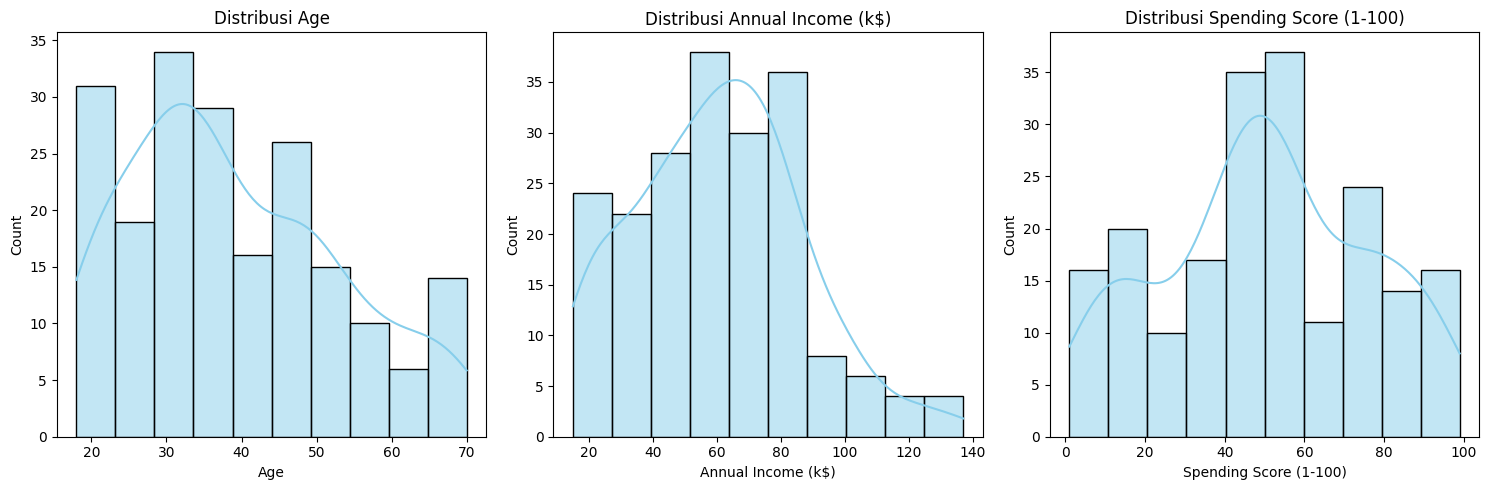

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Muat data
try:
    df = pd.read_csv('Mall_Customers.csv')
    print("Data 'Mall_Customers.csv' berhasil dimuat.")
except FileNotFoundError:
    print("Error: File 'Mall_Customers.csv' tidak ditemukan. Pastikan file sudah diunggah.")
    exit()

# --- 1. Seleksi Fitur Numerik Utama ---
# Mengabaikan CustomerID dan Gender untuk analisis skala dan distribusi
numeric_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X_num = df[numeric_features]

# --- 2. Cek Skala (Statistik Deskriptif) ---
print("\n--- Statistik Deskriptif (Cek Skala Min/Max/Std) ---")
print(X_num.describe())

# --- 3. Cek Distribusi (Histogram) ---
print("\n--- Visualisasi Distribusi Fitur ---")

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_features):
    plt.subplot(1, 3, i + 1)
    # Histogram dan Density Plot (KDE) untuk melihat bentuk distribusi
    sns.histplot(df[feature], kde=True, bins=10, color='skyblue')
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

K Means

Menghitung Inertia untuk setiap nilai K...


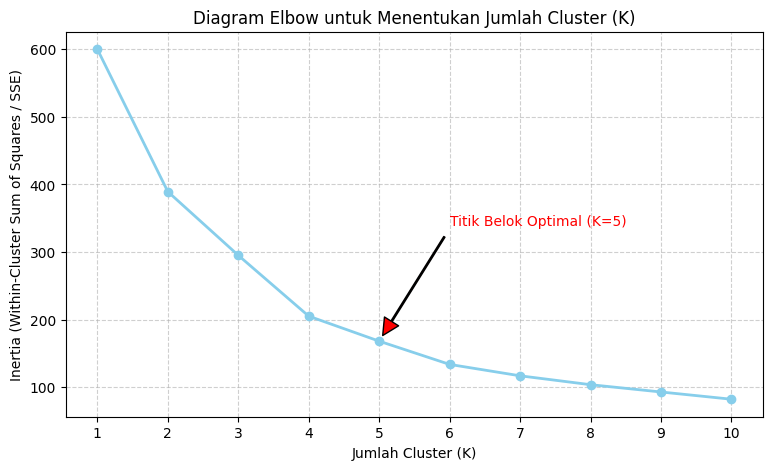


--- Kesimpulan ---
Grafik menunjukkan titik belok yang signifikan (elbow) terjadi pada K=5.
Ini memvalidasi mengapa K=5 dipilih sebagai jumlah cluster optimal.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings

# Abaikan peringatan konvergensi K-Means
warnings.filterwarnings("ignore")

# --- 1. Persiapan Data & Scaling ---
try:
    df = pd.read_csv('Mall_Customers.csv')
except FileNotFoundError:
    print("Error: File 'Mall_Customers.csv' tidak ditemukan. Pastikan file sudah diunggah.")
    exit()

# Pilih 3 fitur numerik utama
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Standard Scaling (Wajib)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. Menghitung Inertia untuk K=1 hingga K=10 ---
wcss = [] # Within-Cluster Sum of Squares (Inertia)

print("Menghitung Inertia untuk setiap nilai K...")
for i in range(1, 11):
    # n_init=10 disarankan, random_state=42 untuk hasil yang konsisten
    kmeans_test = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans_test.fit(X_scaled)
    wcss.append(kmeans_test.inertia_)
    # print(f"K={i}, Inertia={kmeans_test.inertia_:.2f}")

# --- 3. Visualisasi Diagram Elbow ---
plt.figure(figsize=(9, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='skyblue', linewidth=2)
plt.title('Diagram Elbow untuk Menentukan Jumlah Cluster (K)')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares / SSE)')
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.6)

# Menandai titik optimal K=5
plt.annotate(
    'Titik Belok Optimal (K=5)',
    xy=(5, wcss[4]),  # wcss[4] adalah nilai inertia untuk K=5
    xytext=(6, wcss[1] - 50),
    arrowprops=dict(facecolor='red', shrink=0.05, width=1),
    fontsize=10,
    color='red'
)

plt.show()

print("\n--- Kesimpulan ---")
print("Grafik menunjukkan titik belok yang signifikan (elbow) terjadi pada K=5.")
print("Ini memvalidasi mengapa K=5 dipilih sebagai jumlah cluster optimal.")

Klasterisasi Annual Income dan Spending Score

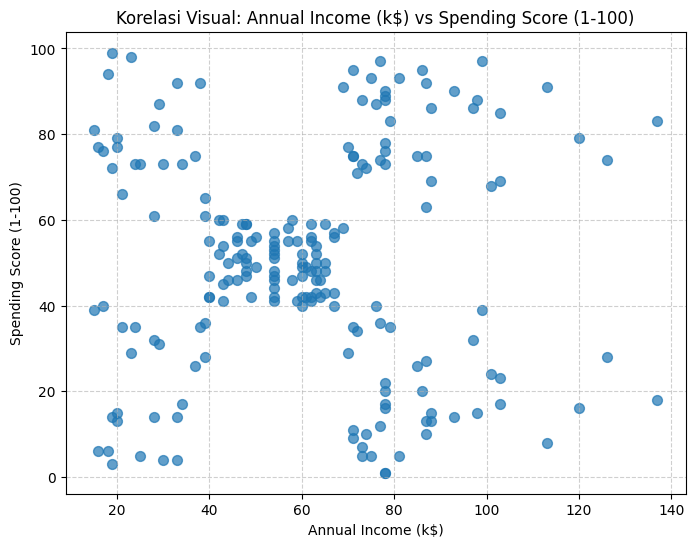


Koefisien Korelasi Pearson antara Income dan Spending Score: 0.0099

--- Interpretasi ---
Scatter plot ini menunjukkan 5 klaster yang berbeda dan terpisah secara visual (meski koefisien Pearson lemah/negatif, ini karena klaster-klaster tersebut mengimbangi satu sama lain).
Klaster ini mendukung pilihan K=5 untuk model K-Means.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Muat data
try:
    df = pd.read_csv('Mall_Customers.csv')
except FileNotFoundError:
    print("Error: File 'Mall_Customers.csv' tidak ditemukan.")
    exit()

# --- 1. Seleksi Fitur Utama ---
feature_x = 'Annual Income (k$)'
feature_y = 'Spending Score (1-100)'

# --- 2. Scatter Plot Visualisasi Korelasi ---
plt.figure(figsize=(8, 6))

# Scatter plot sederhana menggunakan Matplotlib
plt.scatter(df[feature_x], df[feature_y], s=50, alpha=0.7)

# Label dan Judul
plt.title(f'Korelasi Visual: {feature_x} vs {feature_y}')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- 3. Analisis Kuantitatif Korelasi (Pearson) ---
correlation = df[[feature_x, feature_y]].corr().iloc[0, 1]
print(f"\nKoefisien Korelasi Pearson antara Income dan Spending Score: {correlation:.4f}")
print("\n--- Interpretasi ---")
print("Scatter plot ini menunjukkan 5 klaster yang berbeda dan terpisah secara visual (meski koefisien Pearson lemah/negatif, ini karena klaster-klaster tersebut mengimbangi satu sama lain).")
print("Klaster ini mendukung pilihan K=5 untuk model K-Means.")

Klasterisasi Annual Income, Spending Score, dan Age (3 fitur + Baseline)

--- 1. Data Preparation: 3 Fitur Numerik ---

--- 2. Random Grouping (K=5) ---
Silhouette Score Baseline (Random Grouping): -0.0542

--- 3. Visualisasi 3D Random Grouping ---


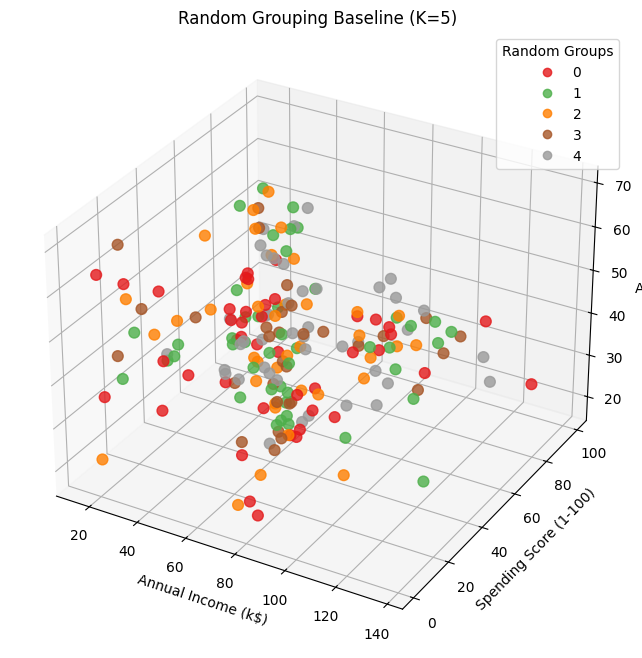


Visualisasi 3D menunjukkan titik-titik yang tersebar secara acak, tidak ada pemisahan yang jelas antar warna (kelompok).


In [30]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import warnings

warnings.filterwarnings("ignore")

# --- 1. DATA PREPARATION & SCALING ---
print("--- 1. Data Preparation: 3 Fitur Numerik ---")
try:
    df = pd.read_csv('Mall_Customers.csv')
except FileNotFoundError:
    print("Error: File 'Mall_Customers.csv' tidak ditemukan.")
    exit()

# Menggunakan 3 Fitur Numerik
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# --- 2. MODEL BASELINE: Random Grouping ---
K_fixed = 5 # Menetapkan 5 kelompok acak untuk membandingkan dengan K-Means
print(f"\n--- 2. Random Grouping (K={K_fixed}) ---")

# Buat label acak dari 0 hingga K_fixed - 1
random.seed(42)
df['Cluster_Baseline'] = [random.randint(0, K_fixed - 1) for _ in range(len(X_scaled))]

# Evaluasi Metrik
score_random = silhouette_score(X_scaled, df['Cluster_Baseline'])
print(f"Silhouette Score Baseline (Random Grouping): {score_random:.4f}")


# --- 3. VISUALISASI 3D BASELINE ---
print("\n--- 3. Visualisasi 3D Random Grouping ---")

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter Plot 3D
scatter = ax.scatter(
    df['Annual Income (k$)'], df['Spending Score (1-100)'], df['Age'],
    c=df['Cluster_Baseline'], cmap='Set1', s=60, alpha=0.8
)

# Label dan Judul
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
ax.set_title(f'Random Grouping Baseline (K={K_fixed})')
ax.legend(*scatter.legend_elements(), title="Random Groups")

plt.show()

print("\nVisualisasi 3D menunjukkan titik-titik yang tersebar secara acak, tidak ada pemisahan yang jelas antar warna (kelompok).")

Klasterisasi Annual Income, Spending Score, dan Age (3 fitur + K Means)

--- Visualisasi 3D Hasil Clustering (K=5) ---


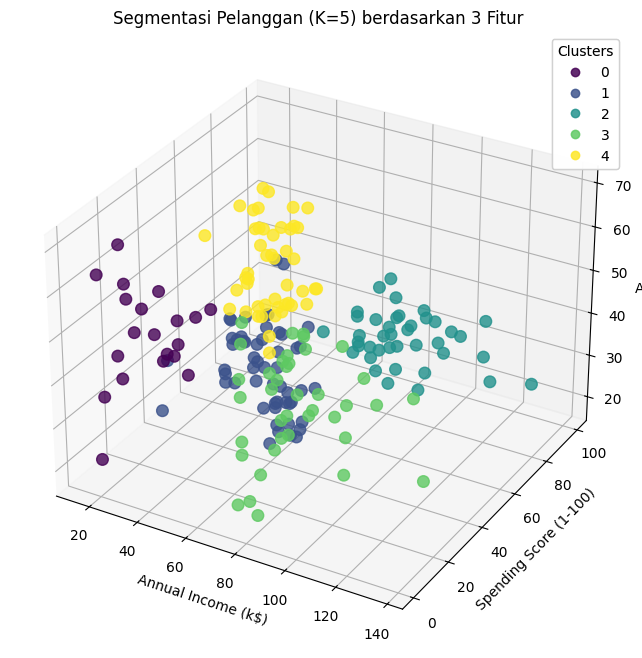

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D # Impor wajib untuk plot 3D

# --- 1. Persiapan Data dan Model ---

# Muat data
try:
    df = pd.read_csv('Mall_Customers.csv')
except FileNotFoundError:
    print("Error: File 'Mall_Customers.csv' tidak ditemukan.")
    exit()

# Fitur yang digunakan
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Terapkan K-Means (K=5, hasil optimal)
K_optimal = 5
kmeans = KMeans(n_clusters=K_optimal, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


# --- 2. Visualisasi 3D ---
print("--- Visualisasi 3D Hasil Clustering (K=5) ---")

fig = plt.figure(figsize=(10, 8))
# Tentukan proyeksi plot sebagai 3D
ax = fig.add_subplot(111, projection='3d')

# Scatter Plot 3D
scatter = ax.scatter(
    # Sumbu X: Annual Income
    df['Annual Income (k$)'],
    # Sumbu Y: Spending Score
    df['Spending Score (1-100)'],
    # Sumbu Z: Age
    df['Age'],
    # Warna berdasarkan hasil cluster
    c=df['Cluster'],
    cmap='viridis',
    s=70,  # Ukuran titik
    alpha=0.8
)

# Label dan Judul
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age') # Age ditempatkan pada sumbu Z
ax.set_title(f'Segmentasi Pelanggan (K={K_optimal}) berdasarkan 3 Fitur')

# Legend untuk Cluster
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

Klasterisasi (semua fitur + K Means) dengan teknik PCA


--- 1. Data Prep: 5 Dimensi (Scaling & Encoding) ---

--- 2. Latih K-Means (K=5) di Ruang 5D ---
--- 3. Reduksi Dimensi dengan PCA (5D -> 3D) ---
Proporsi Varian yang Ditangkap oleh 3 PC: 0.8610

--- 4. Visualisasi 3D (Hasil K-Means 5D pada Ruang PCA) ---


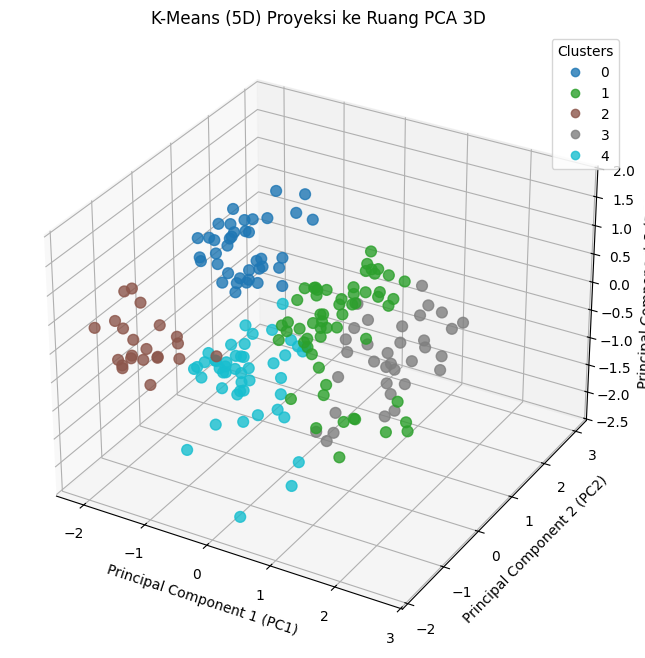


--- Kesimpulan Visualisasi 5D ---
Visualisasi 3D PCA ini menunjukkan pemisahan klaster yang dihasilkan dari SEMUA fitur (5D).
Warna menunjukkan kelompok yang ditemukan K-Means, yang terpisah di ruang PC1, PC2, dan PC3.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA # Tambahan penting untuk reduksi dimensi
from mpl_toolkits.mplot3d import Axes3D
import warnings

warnings.filterwarnings("ignore")

# --- 1. DATA PREPARATION (5 Dimensi) ---
print("--- 1. Data Prep: 5 Dimensi (Scaling & Encoding) ---")
try:
    df = pd.read_csv('Mall_Customers.csv')
except FileNotFoundError:
    print("Error: File 'Mall_Customers.csv' tidak ditemukan.")
    exit()

features_all = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Definisikan transformer untuk 5 dimensi
preprocessor_all = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Gender'])
    ],
    remainder='drop'
)
X_all_processed = preprocessor_all.fit_transform(df[features_all])


# --- 2. MODEL K-MEANS (Latih di 5 Dimensi) ---
K_fixed = 5
print(f"\n--- 2. Latih K-Means (K={K_fixed}) di Ruang 5D ---")

kmeans_all = KMeans(n_clusters=K_fixed, init='k-means++', random_state=42, n_init=10)
# Dapatkan label cluster dari model 5D
cluster_labels_5d = kmeans_all.fit_predict(X_all_processed)


# --- 3. REDUKSI DIMENSI (PCA: 5D -> 3D) ---
print("--- 3. Reduksi Dimensi dengan PCA (5D -> 3D) ---")
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_all_processed)

# Buat DataFrame hasil PCA
pca_df = pd.DataFrame(data=X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster_5D'] = cluster_labels_5d

print(f"Proporsi Varian yang Ditangkap oleh 3 PC: {pca.explained_variance_ratio_.sum():.4f}")


# --- 4. VISUALISASI 3D PCA ---
print("\n--- 4. Visualisasi 3D (Hasil K-Means 5D pada Ruang PCA) ---")

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    pca_df['PC3'],
    c=pca_df['Cluster_5D'],
    cmap='tab10',
    s=60,
    alpha=0.8
)

# Label dan Judul
ax.set_xlabel('Principal Component 1 (PC1)')
ax.set_ylabel('Principal Component 2 (PC2)')
ax.set_zlabel('Principal Component 3 (PC3)')
ax.set_title(f'K-Means (5D) Proyeksi ke Ruang PCA 3D')
ax.legend(*scatter.legend_elements(), title="Clusters")

plt.show()

# --- 5. KESIMPULAN ---
print("\n--- Kesimpulan Visualisasi 5D ---")
print("Visualisasi 3D PCA ini menunjukkan pemisahan klaster yang dihasilkan dari SEMUA fitur (5D).")
print("Warna menunjukkan kelompok yang ditemukan K-Means, yang terpisah di ruang PC1, PC2, dan PC3.")

# ***KESIMPULAN***

**3 Fitur + Baseline**

In [14]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# --- DATA PREP ---
df = pd.read_csv('Mall_Customers.csv')
features_3 = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X_3 = df[features_3]

# Scaling
scaler_3 = StandardScaler()
X_3_scaled = scaler_3.fit_transform(X_3)

# --- MODEL BASELINE (K=5) ---
K_fixed = 5
random.seed(42)
random_labels = [random.randint(0, K_fixed - 1) for _ in range(len(X_3_scaled))]

# --- EVALUASI ---
score_random = silhouette_score(X_3_scaled, random_labels)

print("--- Skenario 1: 3 Fitur + Random Grouping ---")
print(f"Fitur: {features_3}")
print(f"Silhouette Score (Random): {score_random:.4f}")
print("Catatan: Skor yang sangat rendah/negatif menunjukkan cluster acak.")

--- Skenario 1: 3 Fitur + Random Grouping ---
Fitur: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Silhouette Score (Random): -0.0542
Catatan: Skor yang sangat rendah/negatif menunjukkan cluster acak.


**3 Fitur + K Means**

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- DATA PREP ---
df = pd.read_csv('Mall_Customers.csv')
features_3 = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X_3 = df[features_3]

# Scaling
scaler_3 = StandardScaler()
X_3_scaled = scaler_3.fit_transform(X_3)

# --- MODEL K-MEANS (K=5) ---
K_fixed = 5
kmeans_3 = KMeans(n_clusters=K_fixed, init='k-means++', random_state=42, n_init=10)
kmeans_labels_3 = kmeans_3.fit_predict(X_3_scaled)

# --- EVALUASI ---
score_kmeans_3 = silhouette_score(X_3_scaled, kmeans_labels_3)

print("\n--- Skenario 2: 3 Fitur + K-Means ---")
print(f"Fitur: {features_3}")
print(f"Silhouette Score (K-Means): {score_kmeans_3:.4f}")
print("Catatan: Ini adalah skor terbaik yang menunjukkan struktur cluster.")


--- Skenario 2: 3 Fitur + K-Means ---
Fitur: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Silhouette Score (K-Means): 0.4166
Catatan: Ini adalah skor terbaik yang menunjukkan struktur cluster.


**Semua Fitur + K-Means**

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer

# --- DATA PREP (Semua Fitur) ---
df = pd.read_csv('Mall_Customers.csv')
features_all = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X_all = df[features_all]

# Preprocessor untuk Encoding dan Scaling
preprocessor_all = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Gender'])
    ],
    remainder='drop'
)
X_all_processed = preprocessor_all.fit_transform(X_all)

# --- MODEL K-MEANS (K=5) ---
K_fixed = 5
kmeans_all = KMeans(n_clusters=K_fixed, init='k-means++', random_state=42, n_init=10)
kmeans_labels_all = kmeans_all.fit_predict(X_all_processed)

# --- EVALUASI ---
score_kmeans_all = silhouette_score(X_all_processed, kmeans_labels_all)

print("\n--- Skenario 3: Semua Fitur + K-Means ---")
print(f"Fitur: {features_all} (Gender di-encode)")
print(f"Silhouette Score (K-Means): {score_kmeans_all:.4f}")
print("Catatan: Skor lebih rendah karena penambahan Gender tidak terlalu memisahkan cluster.")


--- Skenario 3: Semua Fitur + K-Means ---
Fitur: ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'] (Gender di-encode)
Silhouette Score (K-Means): 0.3153
Catatan: Skor lebih rendah karena penambahan Gender tidak terlalu memisahkan cluster.
